In [45]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import iplot, plot
import warnings
from sklearn.preprocessing import LabelEncoder


In [9]:
df = pd.read_excel('jobs_in_data.xlsx')
#We display some samples in our data for insuring that we're reqding the right dataset
df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
667,2023,Machine Learning Engineer,Machine Learning and AI,USD,197400,197400,United States,Senior,Full-time,In-person,United States,M
4902,2023,Analytics Engineer,Leadership and Management,USD,144628,144628,United States,Mid-level,Full-time,In-person,United States,M
989,2023,Data Architect,Data Architecture and Modeling,USD,210000,210000,United States,Senior,Full-time,Remote,United States,M
6534,2023,Machine Learning Engineer,Machine Learning and AI,USD,122700,122700,United States,Senior,Full-time,In-person,United States,M
508,2023,Data Analyst,Data Analysis,USD,120000,120000,United States,Senior,Full-time,In-person,United States,M
6421,2023,Analytics Engineer,Leadership and Management,USD,183500,183500,United States,Senior,Full-time,Remote,United States,M
9047,2022,Data Scientist,Data Science and Research,GBP,70000,86193,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
720,2023,Analytics Engineer,Leadership and Management,USD,216450,216450,United States,Senior,Full-time,In-person,United States,M
2242,2023,Applied Scientist,Data Science and Research,USD,164000,164000,United States,Senior,Full-time,Remote,United States,M
4772,2023,Research Engineer,Data Science and Research,USD,200000,200000,United States,Senior,Full-time,In-person,United States,M


In [10]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [11]:
df_job_category_general = df['job_category'].value_counts()
df_job_category_general

print(f"Top Job Needed in Four Year'{df_job_category_general.idxmax()}' with Value '{df_job_category_general.max()}",)
print(f"Least Job Needed in Four Year'{df_job_category_general.idxmin()}' with Value '{df_job_category_general.min()}",)

iplot(
    px.bar(
        df_job_category_general,
        labels={'job_category': 'Job Category'},
        title=f'Needed of Job Category in 4 years ago',
        color_discrete_sequence=['#b3079c'],
        template='plotly_dark',
        text_auto=True
    )
)

Top Job Needed in Four Year'Data Science and Research' with Value '3014
Least Job Needed in Four Year'Cloud and Database' with Value '5


In [4]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [14]:
import plotly.offline as pyo
import plotly.express as px

df_job_category = df.groupby('work_year')['job_category'].value_counts()

colors = ['#ccaa14','#8807b3','#07b324','#1007b3']

j=0

for i in range(2020,2024):
    fig = px.bar(
        df_job_category.get(i),
        labels={
            'job_category':'Job Category',
            'value':'Numbre of Employees'
        },title=f'Needed of Job Category in {i}',
        color_discrete_sequence=[colors[j]],
        template='plotly_dark',text_auto=True
    )
    pyo.iplot(fig)
    j+=1

print(j)

4


In [17]:
import plotly.offline as pyo
import plotly.express as px

df_job_category = df.groupby('work_year')['job_category'].value_counts()

colors = ['#ccaa14','#8807b3','#07b324','#1007b3']

j=0

for i in range(2020,2024):
    fig = px.bar(
        df_job_category.get(i),
        labels={
            'job_category':'Job Category',
            'value':'Numbre of Employees'
        },title=f'Needed of Job Category in {i}',
        color_discrete_sequence=[colors[j]],
        template='plotly_dark',text_auto=True
    )
    pyo.iplot(fig)
    j+=1

print(j)

4


<Axes: xlabel='work_year'>

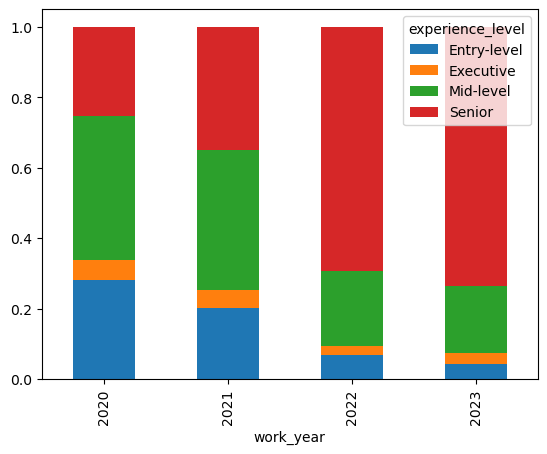

In [19]:
df.groupby('work_year')['experience_level'].value_counts(normalize=True).sort_values(ascending=True).unstack('experience_level').plot(kind = 'bar', stacked=True)

<Axes: >

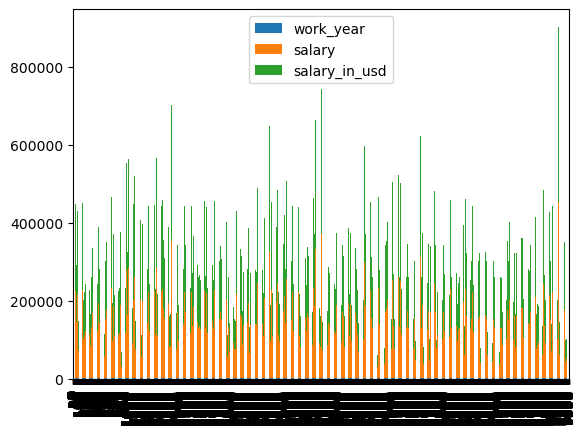

In [20]:
df.sort_index().plot(kind='bar', stacked=True)


ValueError: Could not interpret value `1` for parameter `y`

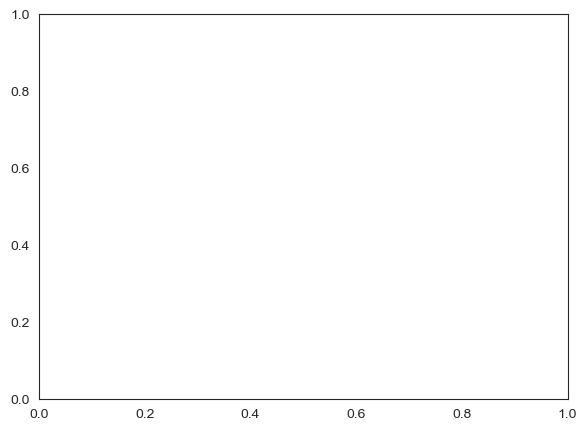

In [49]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
ax = sns.lineplot(
    data = df,
    x = 'work_year',
    y = '1',
    hue = 'category_new',
    estimator='sum'

)
ax.set_ylabel('Number of df')
ax.set_xlabel('Year')
ax.set_title('Number of df grows per category', fontsize = 18)
plt.xticks(df['work_year'].unique())


plt.subplot(1, 2, 2)
ax2 = df[df['work_year']==2023]['category_new'].value_counts().plot(
    kind='barh',
    title= 'Number of jobs per category in 2023'
    )

ax2.set_title('Number of jobs per category in 2023', fontsize = 18)

plt.tight_layout()
plt.show()

In [24]:
top_5_countries = df[df['work_year']==2023]['company_location'].value_counts(normalize = True).head(5)
top_5_countries

company_location
United States     0.894002
United Kingdom    0.045619
Canada            0.023346
Spain             0.008721
Germany           0.003891
Name: proportion, dtype: float64

In [25]:
boxplot_dataframe = df[(df['work_year'] == 2023) & (df['company_location'].isin(top_5_countries.index))]
boxplot_dataframe

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
7492,2023,Machine Learning Engineer,Machine Learning and AI,USD,134500,134500,United States,Senior,Full-time,In-person,United States,L
7493,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Mid-level,Full-time,In-person,United States,M
7494,2023,Data Scientist,Data Science and Research,USD,90000,90000,United States,Mid-level,Full-time,In-person,United States,M
7495,2023,Data Engineer,Data Engineering,USD,160000,160000,United States,Entry-level,Full-time,In-person,United States,M


In [26]:
medians = boxplot_dataframe.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).index
medians

Index(['United States', 'Canada', 'Germany', 'United Kingdom', 'Spain'], dtype='object', name='company_location')

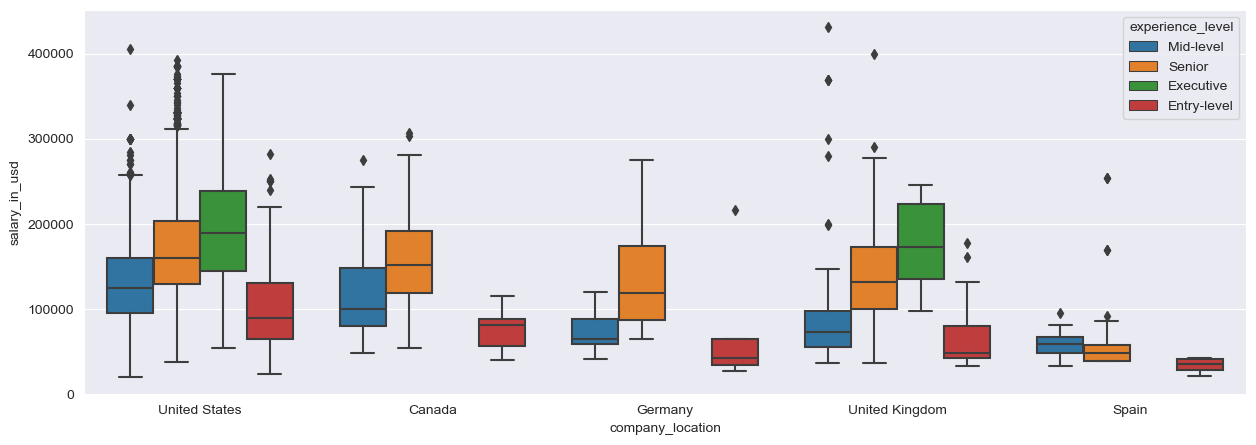

In [27]:
plt.figure(figsize=(15,5))

sns.boxplot(
    data = boxplot_dataframe,
    x = 'company_location',
    y = 'salary_in_usd',
    hue = 'experience_level',
    order = medians
)
plt.show()

In [29]:
level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
top_paid_USA = boxplot_dataframe[boxplot_dataframe['company_location']=="United States"]
mean_pay = top_paid_USA.groupby(['job_category','experience_level'])['salary_in_usd'].mean().unstack('experience_level')
mean_pay = mean_pay[level_order].sort_values(by = 'Senior', ascending = False)
mean_pay_k = mean_pay/1000
plot_order = mean_pay_k.index

In [37]:
encoder = LabelEncoder()

df['job_category'] = encoder.fit_transform(df['job_category'])
df['experience_level'] = encoder.fit_transform(df['experience_level'])
df['job_title'] = encoder.fit_transform(df['job_title'])
df['salary_currency'] = encoder.fit_transform(df['salary_currency'])
df['employee_residence'] = encoder.fit_transform(df['employee_residence'])
df['employment_type'] = encoder.fit_transform(df['employment_type'])
df['work_setting'] = encoder.fit_transform(df['work_setting'])
df['company_location'] = encoder.fit_transform(df['company_location'])
df['company_size'] = encoder.fit_transform(df['company_size'])
df['company_size'] = encoder.fit_transform(df['company_size'])
df['company_size'] = encoder.fit_transform(df['company_size'])
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,42,4,5,88000,95012,29,2,2,0,23,0
1,2023,41,3,10,186000,186000,80,3,2,1,69,1
2,2023,41,3,10,81800,81800,80,3,2,1,69,1
3,2023,69,7,10,212000,212000,80,3,2,1,69,1
4,2023,69,7,10,93300,93300,80,3,2,1,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,71,5,10,165000,165000,80,3,2,2,69,0
9351,2020,69,7,10,412000,412000,80,3,2,2,69,0
9352,2021,114,7,10,151000,151000,80,2,2,2,69,0
9353,2020,69,7,10,105000,105000,80,0,2,2,69,2


In [38]:
df.describe()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000
mean,2022.760449,57.163870,5.488509,9.612293,149927.981293,150299.495564,75.955746,2.581080,1.996366,1.346660,65.655265,0.937039
std,0.519470,28.133797,2.565530,1.345920,63608.835387,63177.372024,14.633195,0.788471,0.104361,0.517058,12.408137,0.304958
min,2020.000000,0.000000,0.000000,0.000000,14000.000000,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.000000,35.000000,4.000000,10.000000,105200.000000,105700.000000,80.000000,2.000000,2.000000,1.000000,69.000000,1.000000
50%,2023.000000,44.000000,7.000000,10.000000,143860.000000,143000.000000,80.000000,3.000000,2.000000,1.000000,69.000000,1.000000
75%,2023.000000,69.000000,7.000000,10.000000,187000.000000,186723.000000,80.000000,3.000000,2.000000,2.000000,69.000000,1.000000
max,2023.000000,124.000000,9.000000,10.000000,450000.000000,450000.000000,82.000000,3.000000,3.000000,2.000000,69.000000,2.000000


In [43]:
df.columns.tolist()


['work_year',
 'job_title',
 'job_category',
 'salary_currency',
 'salary',
 'salary_in_usd',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size']

In [42]:
df.shape

(9355, 12)

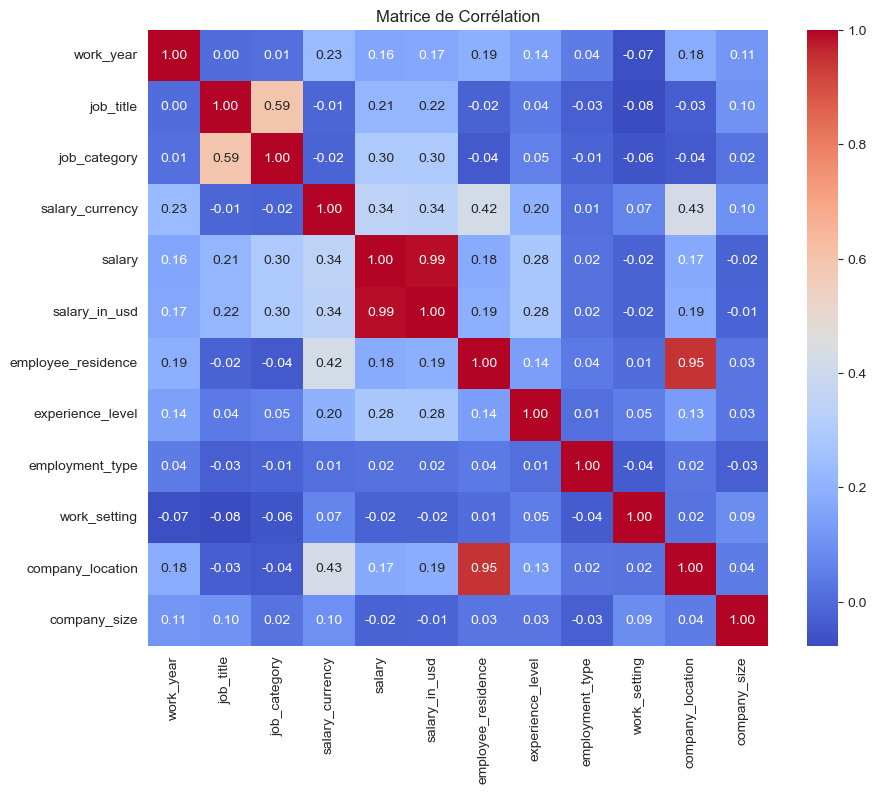

In [40]:
correlation_matrix = df.corr()

# Créer une figure
plt.figure(figsize=(10, 8))

# Dessiner la heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de Corrélation')

# Afficher la figure
plt.show()

In [46]:
# Diviser les données en ensembles d'entraînement et de test
X = df.drop(['salary'], axis=1)  # Features
y = df['salary_in_usd']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
y.shape

(9355,)